### TOP 10s

In [152]:
import pandas as pd 
df = pd.read_csv("data_without_price_outliers.csv")
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


First we try to find expensive houses in each home type. we exclude Lot and Manufactured becuase there are not enough data for them. 

In [153]:
import pandas as pd

grouped = df.groupby('homeType')
exclude_home_types = ['LOT', 'MANUFACTURED']
for home_type, group in grouped:
    if home_type in exclude_home_types:
        continue
    sorted_group = group.sort_values(by='price', ascending=False)
    top_10_expensive = sorted_group.head(10)
    print(f"\nTop 10 expensive houses for Home Type: {home_type}")
    display(top_10_expensive[['sold-history','zipcode','streetAddress', 'yearBuilt', 'lotAreaValue', 'livingAreaValue', 
                              'bedrooms', 'bathrooms', 'stories', 'flooring', 'zestimate', 
                              'price', 'parkingCapacity']])



Top 10 expensive houses for Home Type: APARTMENT


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4607,"[('2014-07-16', 2000000)]",90291,337 6th Ave,1953,595.136618,41.806350,1,1.0,1.0,['Laminate'],3709700.0,4000000,4
3194,"[('2021-08-01', 4950), ('2014-04-03', 3800), (...",90049,750 S Bundy Dr APT 302,1983,2217.597525,165.831855,2,3.0,1.0,['Carpet'],1389800.0,1350000,2
2510,"[('2014-07-03', 1900019), ('2004-02-13', 895000)]",90291,1011 5th Ave,1953,483.188503,56.485024,2,1.0,1.0,[],1351300.0,1055115,0
2478,"[('2017-06-16', 700000), ('2007-07-17', 655000...",90047,1717 W 62nd St,1950,635.270714,298.497339,2,1.0,1.0,"['Wood', 'Laminate']",957800.0,1050000,4
2014,"[('2011-08-03', 640000), ('2001-09-11', 455000)]",90067,2102 Century Park Ln APT 201,1985,54746.787937,123.560990,2,2.0,1.0,[],1125400.0,912360,0
1026,"[('2021-11-20', 2600), ('2008-10-01', 460000)]",91411,15206 Burbank Blvd APT 213,2006,3506.535442,121.702930,2,2.5,1.0,['Wood'],704000.0,699000,0
957,"[('2014-04-21', 436000), ('2006-01-24', 324000)]",90094,6400 Crescent Park E APT 105,2005,2640.120925,69.677250,1,1.0,1.0,['Wood'],690200.0,685000,0
851,"[('1999-10-01', 245000)]",90024,10590 Wilshire Blvd APT 504,1976,1946.041699,121.888736,2,2.0,1.0,['Wood'],914300.0,659207,0
829,"[('2013-12-06', 349000), ('2013-08-29', 257732...",90047,1707 W 70th St,1925,489.598810,77.759811,2,1.0,1.0,['Tile'],651800.0,650000,2
765,"[('2007-01-19', 535000), ('2006-07-20', 535000...",90067,2160 Century Park E APT 2101N,1966,20720.647844,77.295296,1,1.0,1.0,['Wood'],646900.0,635000,0



Top 10 expensive houses for Home Type: CONDO


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4688,"[('1996-10-09', 2750000)]",90024,10601 Wilshire Blvd #20C,1982,3667.264532,503.905872,3,5.0,1.0,"['Marble', 'Wood']",7955500.0,7751535,5
4638,"[('2013-11-22', 3850038)]",90024,10490 Wilshire Blvd APT 2104,1989,7873.975502,439.709899,3,4.0,1.0,"['Wood', 'Marble', 'Tile']",4932900.0,4910000,2
4623,"[('2023-11-22', 4320000), ('2021-08-31', 24750...",90067,10108 Empyrean Way APT 302,1979,43160.571272,243.034248,2,3.0,1.0,"['Wood', 'Carpet', 'Tile']",4549400.0,4495000,2
4600,"[('2001-06-15', 2725000), ('1998-08-17', 22000...",90067,10248 Century Woods Dr,1990,28834.686872,576.834727,5,5.0,1.0,"['Carpet', 'Wood', 'Tile']",4328200.0,4326000,6
4606,"[('2022-03-15', 3300000), ('2019-07-01', 19000...",90067,1 W Century Dr UNIT 4D,2010,14997.258474,227.612350,2,3.0,1.0,['Wood'],4262400.0,4200000,2
4575,"[('2019-10-23', 4250000), ('2015-04-10', 33000...",90024,10660 Wilshire Blvd APT 1801,1980,3428.499792,515.890359,4,5.0,1.0,"['Wood', 'Mixed']",4005600.0,4000000,2
4515,"[('2021-08-17', 16000), ('2011-04-29', 2800028)]",90067,1 W Century Dr UNIT 7C,2010,14992.806928,258.270340,2,3.0,1.0,"['Wood', 'Marble']",3766800.0,3700000,2
4529,[],90024,10375 Wilshire Blvd UNIT 8GH,1958,8665.541318,424.845419,3,5.0,1.0,['Carpet'],3744800.0,3690000,4
4527,"[('2019-06-07', 2795000), ('1999-03-04', 13300...",90024,10380 Wilshire Blvd APT 804,1990,3069.138624,296.360570,3,4.0,1.0,"['Carpet', 'Tile']",3586400.0,3599000,2
4386,"[('2012-04-27', 1395000)]",90024,10350 Wilshire Blvd PENTHOUSE 3,1982,2010.075362,222.223976,3,3.0,1.0,"['Wood', 'Carpet', 'Mixed', 'Tile']",3168800.0,3100000,2



Top 10 expensive houses for Home Type: MULTI_FAMILY


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4660,[],90033,571 Fairview Ave,1964,1568.111798,1115.393418,1,38.0,3.0,[],5088500.0,4995000,16
4646,[],90025,1218 McClellan Dr,1972,1092.353474,1092.353474,16,16.0,2.0,[],5026800.0,4965000,16
4644,"[('2004-04-16', 1860000)]",90025,1814 Fox Hills Dr,1949,787.074216,541.810296,8,4.0,1.0,[],4337500.0,4870500,0
4621,[],90049,11675 Darlington Ave,1986,826.929603,826.929603,17,17.0,3.0,[],4902200.0,4825000,0
4625,"[('2014-08-01', 2240000), ('2005-09-01', 22400...",90293,6955 Trolleyway,1957,350.058504,350.058504,8,7.0,3.0,[],4798500.0,4700000,6
4574,[],90027,1554-1556 N Alexandria Ave,1955,1275.570272,980.869874,18,12.0,2.0,[],4485400.0,4400000,12
4594,[],91601,10916 Peach Grove St,1986,926.242910,926.242910,20,20.0,3.0,[],4091300.0,4057725,19
4547,"[('2015-04-28', 3275000), ('2009-12-22', 14500...",90291,341 5th Ave,1921,489.669416,371.612000,4,3.0,1.0,"['Wood', 'Other']",3897900.0,3850000,3
4546,[],90016,5110 W Washington Blvd,1946,2207.157444,1011.249155,34,34.0,1.0,[],3835700.0,3750000,14
4549,"[('2019-10-18', 637000)]",90037,1260 Leighton Ave,2023,730.589192,730.589192,16,21.0,3.0,[],3831700.0,3750000,0



Top 10 expensive houses for Home Type: SINGLE_FAMILY


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4729,"[('2020-08-18', 5700000), ('2015-12-29', 89000...",90069,1432 Tanager Way,2023,1063.514808,975.481500,4,6.0,2.0,"['Tile', 'Wood', 'Stone', 'Stone']",22824000.0,23700000,4
4721,[],90210,11 Beverly Ridge Ter,2006,12688.524844,1209.039642,6,10.0,2.0,"['Wood', 'Stone', 'Wood']",23511800.0,23500000,7
4718,[],90069,1475 N Doheny Dr,1927,7619.832694,532.705802,6,8.0,1.0,"['Wood', 'Tile', 'Other', 'Stone']",20810500.0,20800000,15
4730,"[('2022-02-03', 4100000), ('1994-03-24', 64500...",91436,4550 Libbit Ave,1951,3829.559597,415.740925,5,5.0,1.0,[],19157400.0,19000000,1
4714,"[('1996-05-29', 1375000)]",90272,563 Spoleto Dr,2004,1951.395892,716.560839,5,7.0,2.0,['Mixed'],18366000.0,18300000,3
4725,"[('2020-11-06', 18500000), ('1995-04-20', 4675...",90077,801 Tarcuto Way,1953,10091.250096,694.264119,7,7.0,2.0,"['Wood', 'Tile', 'Carpet']",18326300.0,18000000,10
4719,"[('2023-11-15', 15900000), ('2012-12-18', 2000...",90046,1871 N Stanley Ave,2021,2797.189632,937.112561,6,9.0,3.0,"['Wood', 'Stone']",17440600.0,17250000,20
4713,"[('2019-11-15', 18000000), ('2016-04-11', 6300...",90210,1357 Laurel Way,2020,2044.068986,1042.836175,5,9.0,3.0,['Mixed'],17328800.0,17000000,6
4732,"[('2021-12-29', 16750000), ('2017-03-03', 5450...",90024,467 Comstock Ave,2021,2044.473672,882.578500,6,7.0,2.0,['Mixed'],17094300.0,16750000,5
4716,"[('2020-12-23', 6750000), ('1999-12-16', 25500...",90272,14928 La Cumbre Dr,2024,1384.835492,856.751466,6,8.0,3.0,['Wood'],16554100.0,16550000,6



Top 10 expensive houses for Home Type: TOWNHOUSE


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4681,"[('2012-05-24', 240000)]",91311,10521 Larwin Ave UNIT 6,1972,5519.917040,96.804926,2,2.0,1.0,[],5540100.0,5537000,2
4201,[],90049,12540 W The Vis,1982,18983.820260,255.204541,3,3.0,2.0,"['Wood', 'Parquet', 'Carpet', 'Tile']",2537800.0,2499000,4
3903,[],90291,715 Venice Blvd,2017,757.166511,262.915490,3,3.0,2.0,['Wood'],1965700.0,1925000,2
3806,[],90069,728 N Sweetzer Ave APT 103,2021,219.158177,219.158177,2,3.0,4.0,['Wood'],1841700.0,1800000,3
3747,"[('1997-11-26', 469000)]",90293,132 Convoy St,1981,2044.473672,222.967200,2,3.0,3.0,"['Wood', 'Tile', 'Carpet']",1758200.0,1739000,2
3623,"[('2017-11-02', 1505000), ('2007-12-28', 89500...",90291,550 Vernon Ave #D,2005,474.696054,183.018910,4,3.0,3.0,"['Wood', 'Carpet', 'Tile', 'Mixed']",1630600.0,1610000,2
3551,"[('2013-05-24', 985000), ('2003-08-15', 689000)]",90025,1732 Stoner Ave APT 101,2002,616.875920,206.244660,3,3.0,3.0,['Wood'],1561500.0,1550000,3
3508,[],90025,1714 Stoner Ave APT 9,1980,1371.076168,202.900152,3,3.0,3.0,"['Stone', 'Carpet']",1569800.0,1550000,2
3340,"[('2008-12-12', 812500), ('2005-08-05', 875000...",90025,1740 S Westgate Ave UNIT C,2002,1116.231012,206.802078,3,3.0,3.0,"['Laminate', 'Tile', 'Wood']",1467800.0,1435000,2
3351,[],90067,2393 Century Hl,1980,73170.061602,211.261422,2,3.0,3.0,"['Carpet', 'Vinyl', 'Marble', 'Tile', 'Other']",1453400.0,1427000,3


Then we try to find the cheapest and the most expensive areas for each home type using zipcode.

In [154]:
import pandas as pd
from tabulate import tabulate

average_prices_by_zipcode_home_type = df.groupby(['zipcode', 'homeType'])['price'].mean().reset_index()
most_expensive_areas_by_home_type = average_prices_by_zipcode_home_type.sort_values(by=['homeType', 'price'], ascending=[True, False])
home_types = most_expensive_areas_by_home_type['homeType'].unique()
for home_type in home_types:
    if home_type in exclude_home_types:
        continue
    print(f"\nTop 10 most expensive areas for {home_type} based on average house prices:")
    print(tabulate(most_expensive_areas_by_home_type[most_expensive_areas_by_home_type['homeType'] == home_type].head(10).drop(columns=['homeType']), headers='keys', tablefmt='pretty'))



Top 10 most expensive areas for APARTMENT based on average house prices:
+-----+---------+-----------+
|     | zipcode |   price   |
+-----+---------+-----------+
| 186 | 90291.0 | 2527557.5 |
| 127 | 90049.0 | 1350000.0 |
| 121 | 90047.0 | 850000.0  |
| 156 | 90067.0 | 773680.0  |
| 307 | 91411.0 | 699000.0  |
| 170 | 90094.0 | 685000.0  |
| 49  | 90024.0 | 659207.0  |
| 34  | 90017.0 | 208000.0  |
+-----+---------+-----------+

Top 10 most expensive areas for CONDO based on average house prices:
+-----+---------+--------------------+
|     | zipcode |       price        |
+-----+---------+--------------------+
| 157 | 90067.0 |     1807400.0      |
| 168 | 90077.0 |     1527000.0      |
| 50  | 90024.0 | 1503846.2063492064 |
| 191 | 90292.0 |     1300625.0      |
| 101 | 90041.0 |     1300000.0      |
| 128 | 90049.0 | 1255558.0232558139 |
| 124 | 90048.0 | 1239989.3043478262 |
| 249 | 91326.0 |     1212500.0      |
| 22  | 90010.0 |     1190150.0      |
| 171 | 90094.0 |     119000

In [155]:
average_prices_by_zipcode_home_type = df.groupby(['zipcode', 'homeType'])['price'].mean().reset_index()
cheapest_areas_by_home_type = average_prices_by_zipcode_home_type.sort_values(by=['homeType', 'price'], ascending=[True, True])
home_types = cheapest_areas_by_home_type['homeType'].unique()
for home_type in home_types:
    if home_type in exclude_home_types:
        continue
    print(f"\nTop 10 cheapest areas for {home_type} based on average house prices:")
    print(tabulate(cheapest_areas_by_home_type[cheapest_areas_by_home_type['homeType'] == home_type].head(10).drop(columns=['homeType']), headers='keys', tablefmt='pretty'))


Top 10 cheapest areas for APARTMENT based on average house prices:
+-----+---------+-----------+
|     | zipcode |   price   |
+-----+---------+-----------+
| 34  | 90017.0 | 208000.0  |
| 49  | 90024.0 | 659207.0  |
| 170 | 90094.0 | 685000.0  |
| 307 | 91411.0 | 699000.0  |
| 156 | 90067.0 | 773680.0  |
| 121 | 90047.0 | 850000.0  |
| 127 | 90049.0 | 1350000.0 |
| 186 | 90291.0 | 2527557.5 |
+-----+---------+-----------+

Top 10 cheapest areas for CONDO based on average house prices:
+-----+---------+--------------------+
|     | zipcode |       price        |
+-----+---------+--------------------+
| 274 | 91352.0 |      357500.0      |
| 228 | 91304.0 | 408409.0909090909  |
| 133 | 90057.0 |      421125.0      |
| 259 | 91340.0 |      426000.0      |
| 252 | 91331.0 | 430564.28571428574 |
| 290 | 91402.0 |      435000.0      |
| 240 | 91316.0 |      436800.0      |
| 215 | 90744.0 |      449000.0      |
| 276 | 91356.0 | 451023.8095238095  |
| 256 | 91335.0 |      455000.0      |
+

`show_avg_during_yearBuilt:` This function visualizes the average values of a specified column (`col`) over the years in which buildings were constructed (`yearBuilt`). The data is grouped by the `yearBuilt` column, and the mean of the specified column is calculated for each year.

`show_count_during_yearBuilt:` This function visualizes the count of entries where the specified column (`col`) equals `1` over the years in which buildings were constructed (`yearBuilt`). The data is filtered to include only rows where the specified column equals `1`. The count of such rows is then calculated for each year in the `yearBuilt` column.

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_avg_during_yearBuilt(df, col):
    avg_values_by_yearBuilt = df.groupby("yearBuilt")[col].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=avg_values_by_yearBuilt, x='yearBuilt', y=col, marker="o")
    plt.xlabel("yearBuilt")
    plt.ylabel(f"Average {col}")
    plt.xticks(range(1885, 2024, 10))    
    plt.title(f"Average {col} Over the yearBuilt")
    plt.grid()
    plt.show()

def show_count_during_yearBuilt(df, col):
    filtered_df = df[df[col] == 1]
    count_values_by_yearBuilt = filtered_df.groupby("yearBuilt").size().reset_index(name='count')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=count_values_by_yearBuilt, x='yearBuilt', y='count', marker="o")
    plt.xlabel("yearBuilt")
    plt.ylabel(f"Count of '1' in {col}")
    plt.xticks(range(1885, 2024, 10))    
    plt.title(f"Count of '1' in {col} Over the yearBuilt")
    plt.grid()
    plt.show()


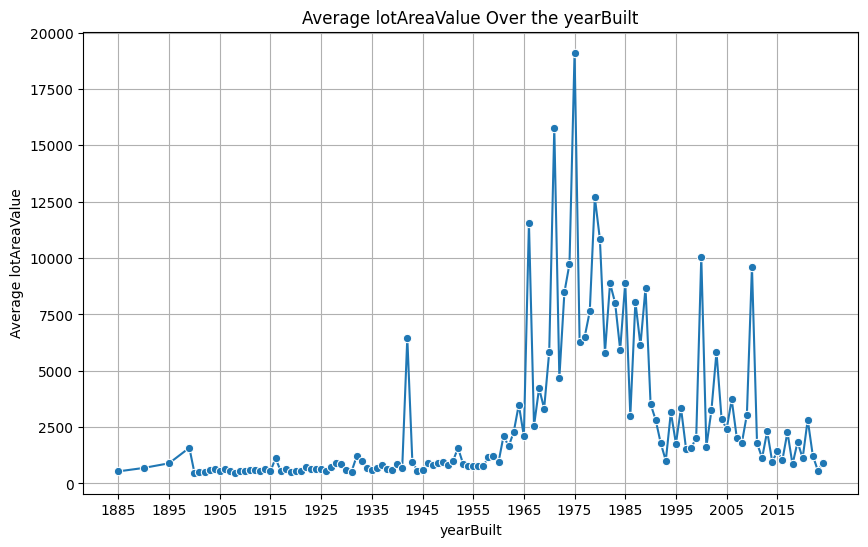

In [157]:
show_avg_during_yearBuilt(df, "lotAreaValue")

- From 1885 to around 1930, the average lot area value remains relatively low and stable with minor fluctuations. 
- There are small spikes, but overall, the values do not show significant changes during this period.
- Around 1935 and 1940, there are noticeable spikes in the average lot area value, reaching values significantly higher than the preceding years. This could indicate specific events or changes in urban development policies that affected lot values during these years. also lack of data in this span may be the reason.
- From the mid-1940s, there's a marked increase in the average lot area value, peaking around 1970. The rapid increase post-1945 may be attributed to post-World War II economic growth, suburban expansion, and increased housing development.
After peaking around 1970, the average lot area value begins to decline, showing a downward trend until about 1990. The decline could be due to economic recessions, changes in housing demand, or shifts in urban planning policies.
- From 1990 onwards, the plot shows more fluctuations with several peaks and troughs. Despite these fluctuations, the overall trend seems to stabilize around a lower average value compared to the earlier peak years.

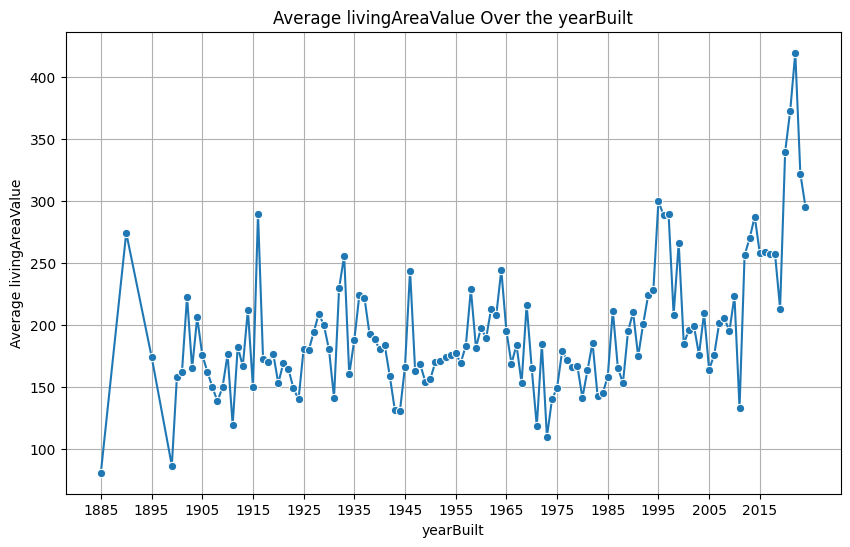

In [158]:
show_avg_during_yearBuilt(df, "livingAreaValue")

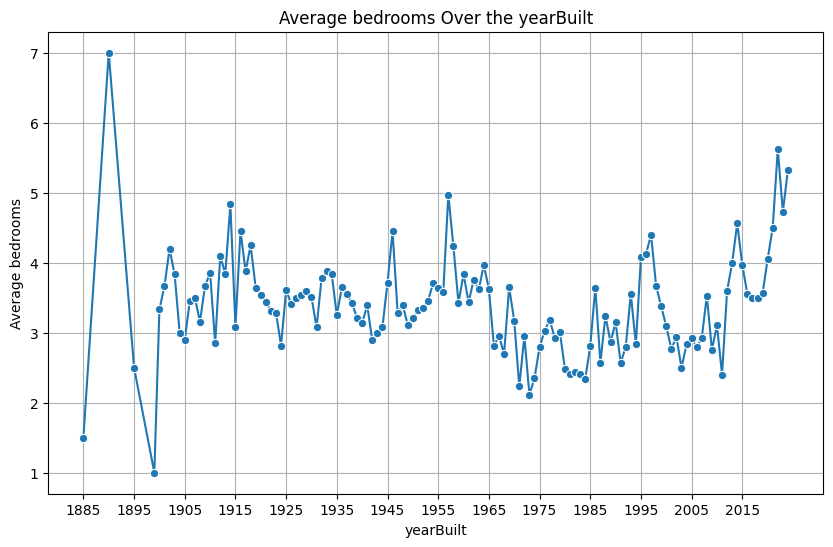

In [159]:
show_avg_during_yearBuilt(df, "bedrooms")


- From 1900 to around 1940, the average number of bedrooms stabilizes somewhat, fluctuating between 3 and 5 bedrooms. There are minor peaks and troughs, but the overall trend remains relatively stable within this range.
- The period from 1940 to 1980 shows increased fluctuations with average bedrooms varying between 3 and 5. This period includes some notable peaks around 1955 and 1975 where the average bedrooms rise closer to 5.
- From 1980 to around 2000, the average number of bedrooms shows a slight downward trend with more frequent dips below 4. The lowest average in this period appears to be around 1995, where the number dips close to 3 bedrooms.
- From 2000 onwards, there is a noticeable upward trend in the average number of bedrooms. The number rises steadily, reaching close to 6 by 2020, indicating a recent trend towards larger homes with more bedrooms.

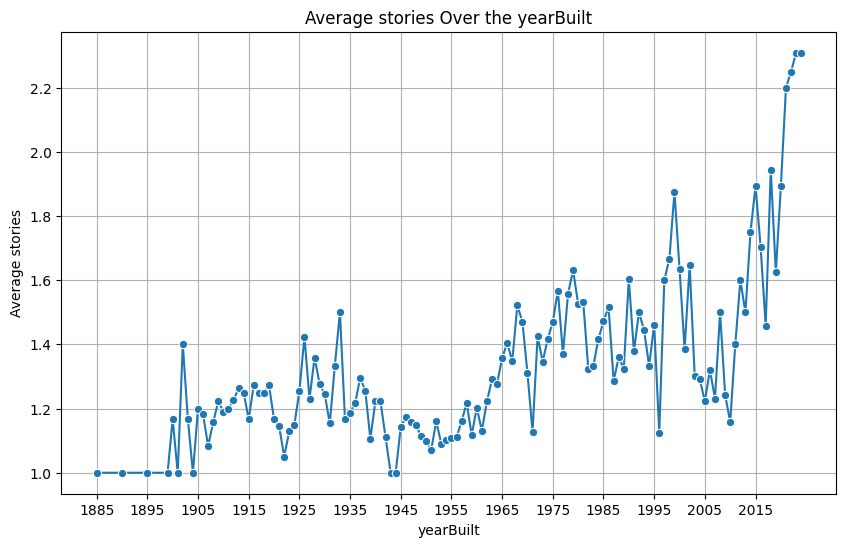

In [160]:
show_avg_during_yearBuilt(df, "stories")


The plot illustrates how the average number of stories in buildings has evolved over time. Initially, there was low variability and stability, followed by a gradual increase in the mid-20th century, and a significant upward trend from 1980 onwards. This trend towards taller buildings in recent years could be due to changes in urban development, zoning laws, and a demand for higher density living spaces.

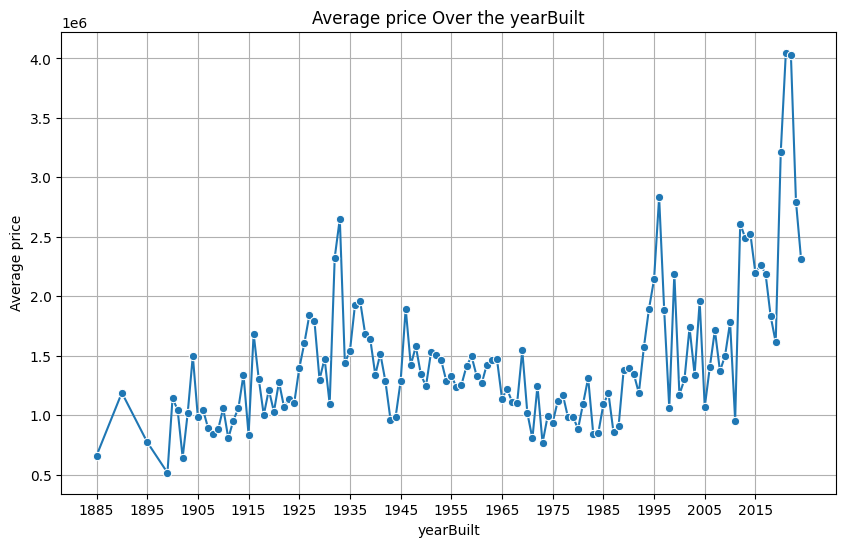

In [161]:
show_avg_during_yearBuilt(df, "price")

### Reasonable Explanation for the Observed Trends in Average Prices Over YearBuilt

The trends observed in the average prices over the years can be attributed to a combination of historical, economic, and societal factors. Here are some reasonable explanations for each period highlighted in the analysis:

- `1885-1930:`
   - **Economic Cycles**: The late 19th and early 20th centuries experienced several economic cycles, including periods of rapid growth and recession. For instance, the post-World War I economic boom likely contributed to higher average prices around 1920.
   - **Urbanization**: This period saw significant urbanization and industrialization, particularly in the United States and Europe. The rapid expansion of cities and demand for housing could have caused price fluctuations.
   - **Construction Techniques**: Advances in construction technology and materials might have impacted building costs, reflecting in price variability.

- `1930-1980:`
   - **Great Depression**: The economic impact of the Great Depression in the 1930s likely caused a temporary peak followed by stabilization as economies recovered.
   - **Post-War Economic Stability**: After World War II, many countries experienced economic stability and growth. The establishment of suburban areas and government policies promoting homeownership (e.g., GI Bill in the US) could have contributed to steady prices.
   - **Inflation Control**: Efforts to control inflation and stable economic policies in many developed countries during the mid-20th century likely led to a more stable real estate market.

- `1980-2000:`
   - **Economic Recessions**: This period includes significant economic recessions, such as the early 1980s recession and the early 1990s recession, which likely led to decreased demand for housing and lower average prices.
   - **Market Corrections**: After periods of rapid price increases, real estate markets often undergo corrections. This could explain the fluctuations and general decline during this period.
   - **Changing Housing Preferences**: Societal shifts, including changing family structures and preferences for different types of housing, might have influenced market dynamics.

- `2000-2020:`
   - **Housing Boom**: The early 2000s saw a significant housing boom, fueled by low interest rates, relaxed lending standards, and speculative investment. This led to a sharp increase in prices.
   - **Global Financial Crisis**: The 2008 financial crisis caused a temporary dip in prices, but recovery efforts and economic stimuli led to a rebound and further price increases in the following decade.
   - **Urbanization and Demand**: Continued urbanization and increasing demand for housing in major cities drove up prices. Additionally, limited supply in desirable areas contributed to the upward trend.
   - **Inflation and Investment**: Rising inflation and increased investment in real estate as a hedge against inflation also contributed to higher average prices.  

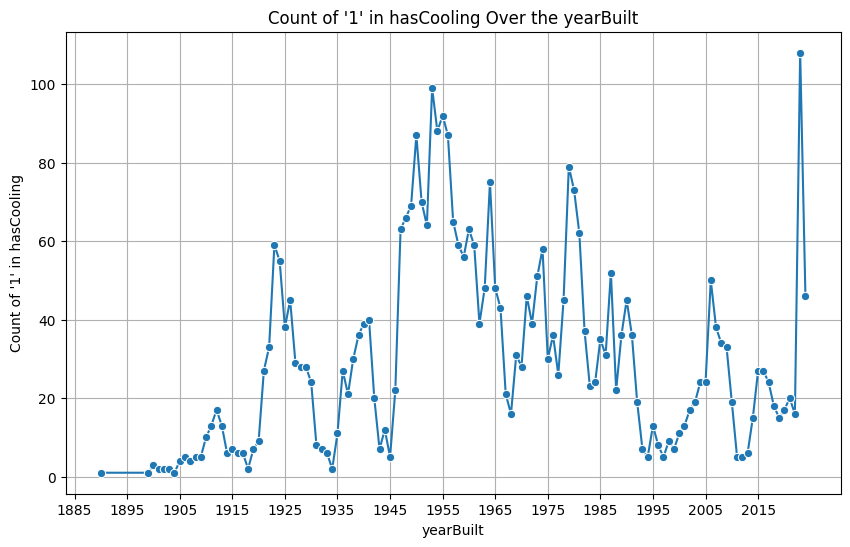

In [162]:
show_count_during_yearBuilt(df, "hasCooling")

- The initial period shows almost no adoption of cooling systems, reflecting the historical fact that cooling technologies were either non-existent or not commonly used in residential buildings.

- Between 1925 and 1965, there is a significant increase in the count of buildings with cooling systems. Notable peaks are observed around 1940 and 1955, where the count of buildings with cooling systems rises sharply. This period corresponds with the widespread adoption of air conditioning technologies in residential buildings, particularly in the United States. The increase could also be attributed to post-war construction booms and rising living standards.

- From 1965 to around 2000, the count of buildings with cooling systems shows considerable fluctuations. Despite these fluctuations, there is a general trend of cooling system installations, reflecting the ongoing demand for and availability of cooling technologies. Economic cycles, changes in building codes, and regional climate variations might have influenced these fluctuations.

- From 2000 onwards, the plot shows a period of lower counts until a sharp increase around 2020. The overall lower counts in the early 21st century could be due to improved energy efficiency standards, alternative cooling solutions, or variations in the dataset. The sharp increase around 2020 suggests a recent surge in the adoption of cooling systems, potentially driven by increasing temperatures, improved affordability, and technological advancements in HVAC systems.

Key factors influencing these trends include the introduction and widespread availability of air conditioning technologies, economic conditions, building booms, regional climate needs, and advancements in energy efficiency standards. The sharp increase in recent years may reflect a growing response to climate change and the increasing need for residential cooling solutions.

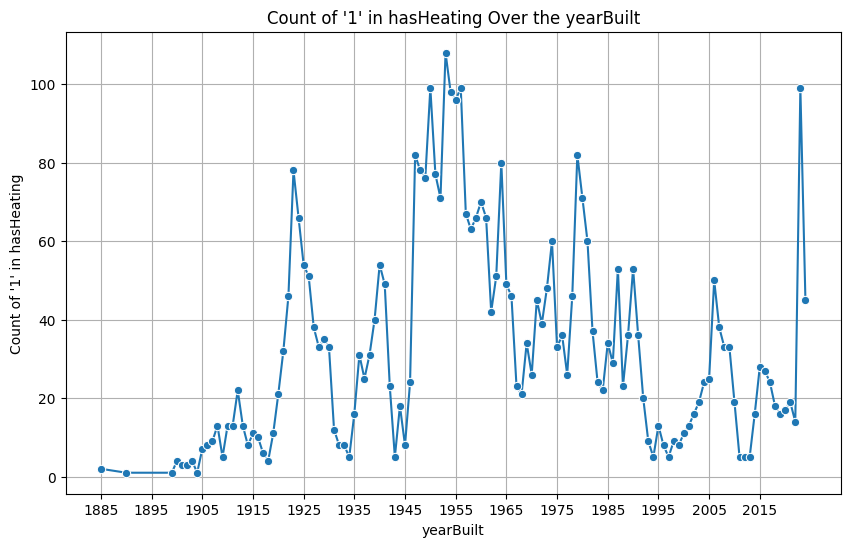

In [163]:
show_count_during_yearBuilt(df, "hasHeating")

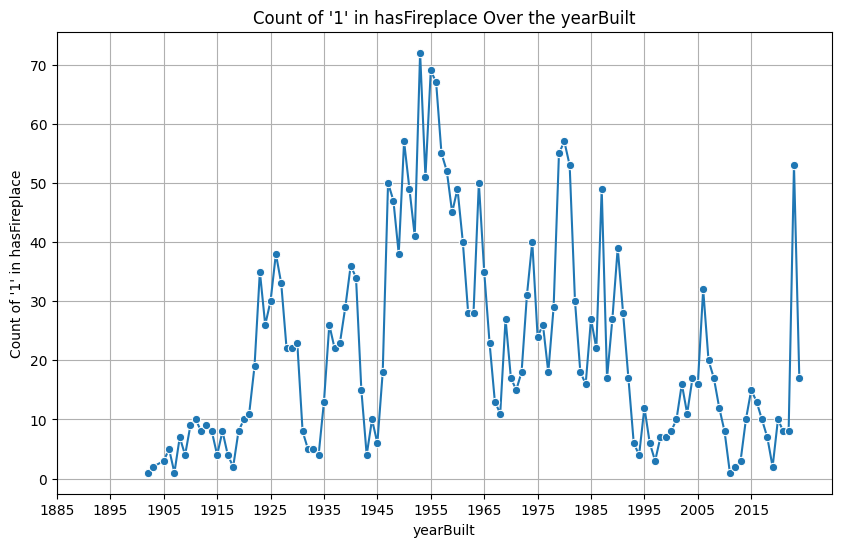

In [164]:
show_count_during_yearBuilt(df, "hasFireplace")

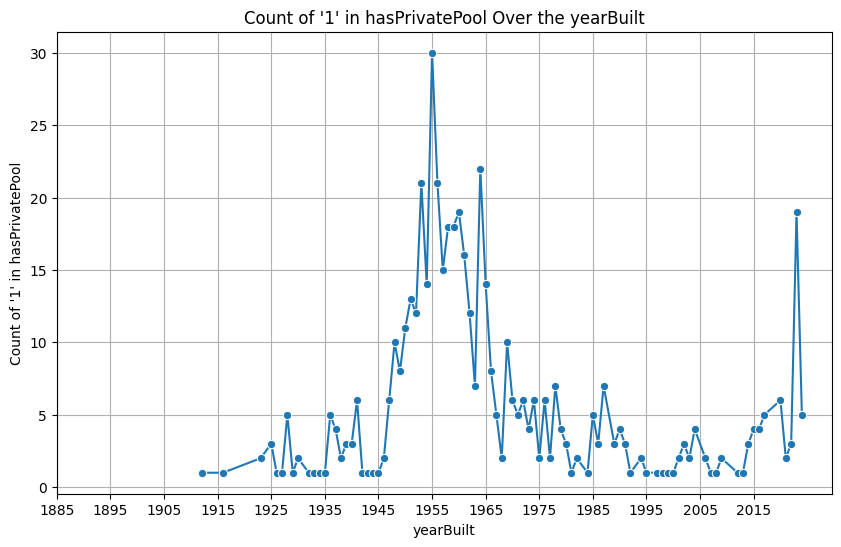

In [165]:
show_count_during_yearBuilt(df, "hasPrivatePool")


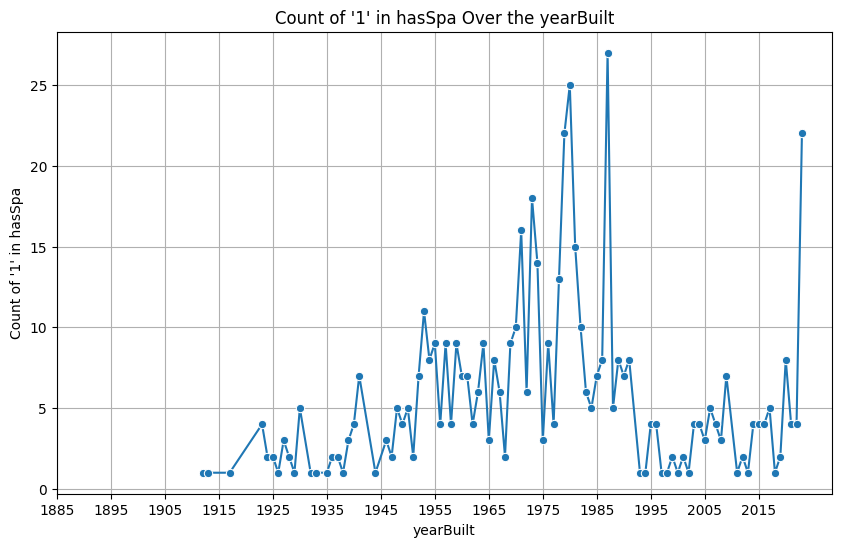

In [166]:
show_count_during_yearBuilt(df, "hasSpa")


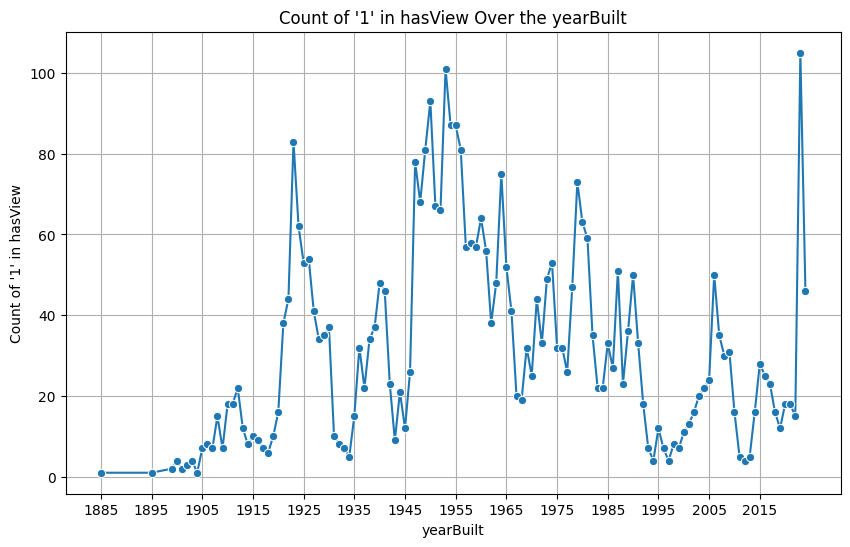

In [167]:
show_count_during_yearBuilt(df, "hasView")

Now we Assess the accuracy of Zestimate (predicted prices) compared to actual house prices.
- **Metrics**:
   - **Mean Absolute Error (MAE)**: Average magnitude of prediction errors.
   - **Mean Squared Error (MSE)**: Average squared prediction errors, emphasizing larger errors.
   - **R-squared (R²) Score**: Proportion of variance in actual prices explained by Zestimate.
- **Visualization**: Scatter plot comparing actual prices to Zestimate, with a red dashed line indicating perfect prediction alignment.

Mean Absolute Error: 36833.46863780359
R-squared Score: 0.9967118856996015


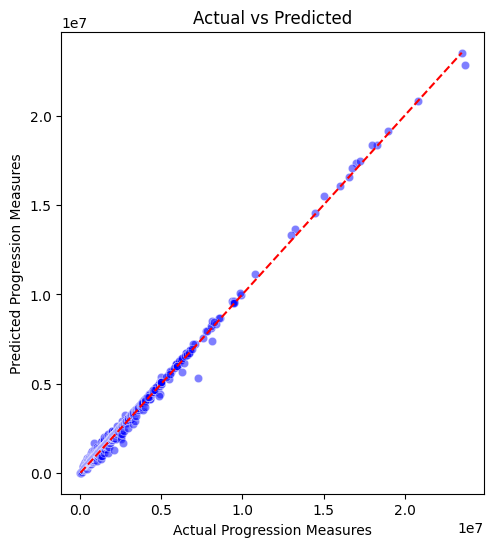

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df['price'], df['zestimate'])
r2 = r2_score(df['price'], df['zestimate'])

print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["price"].values.reshape(-1), y=df["zestimate"].values.reshape(-1), color='blue', alpha=0.5)
plt.plot([min(df["zestimate"]), max(df["zestimate"])], [min(df["zestimate"]), max(df["zestimate"])], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')

plt.show()

1. **Mean Absolute Error (MAE)**: On average, the Zestimate is off by about $36,833 from the actual house prices. This value represents the average absolute difference between the predicted and actual prices. In the context of real estate prices, this is a relatively small error, indicating that the predictions are fairly accurate.

2. **R-squared (R²) Score**: The R² score is 0.9967, which means that 99.67% of the variance in the actual house prices can be explained by the Zestimate. This is an exceptionally high value, indicating that the model's predictions are very closely aligned with the actual prices and that the model explains nearly all the variability in the data.

The low MAE and high R² score indicate that the Zestimate is highly accurate in predicting house prices. The predictions are very close to the actual prices, and the model explains almost all of the variance in the data. The combination of low MAE and very high R² score collectively demonstrate that the Zestimate model performs exceptionally well in predicting house prices in this dataset.